<a href="https://colab.research.google.com/github/idarwati/Health-Data-Analytics-Portfolio/blob/Day-3/H3_Machine_Learning_Glaucoma_01_12_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 AKURASI MODEL: 89.50%
------------------------------


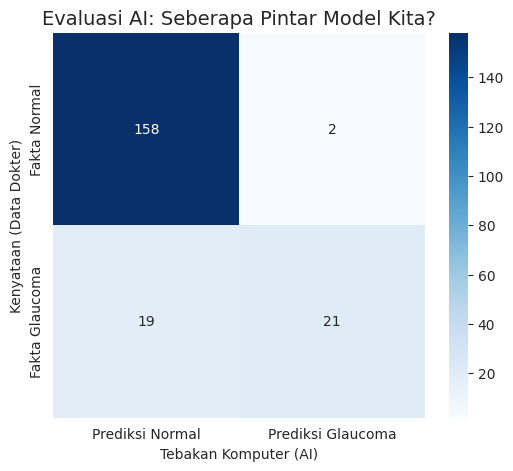


🏥 === SIMULASI PASIEN DATANG ===
Pasien 1 (Umur 65, IOP 25) --> AI Memprediksi: BERISIKO GLAUKOMA ⚠️
Pasien 2 (Umur 30, IOP 14) --> AI Memprediksi: Normal ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setup Tampilan
sns.set_style("whitegrid")

# ==========================================
# 1. PERSIAPAN DATA (Sama seperti Day 2)
# ==========================================
np.random.seed(42)
n_pasien = 1000

# Variabel: Umur & Tekanan Mata (IOP)
umur = np.random.randint(20, 90, n_pasien)
# Logika: Semakin tua, IOP naik sedikit + variasi acak
iop = 12 + (umur * 0.1) + np.random.normal(0, 3, n_pasien)

# Label Target (Diagnosis Dokter)
diagnosis = []
for tekanan in iop:
    # Jika tekanan > 21, peluang Glaucoma 90%
    if tekanan > 21:
        diag = np.random.choice([1, 0], p=[0.9, 0.1]) # 1=Glaucoma, 0=Normal
    else:
        diag = np.random.choice([1, 0], p=[0.1, 0.9])
    diagnosis.append(diag)

df = pd.DataFrame({'Umur': umur, 'Tekanan_IOP': iop, 'Diagnosis': diagnosis})

# ==========================================
# 2. MACHINE LEARNING ENGINE
# ==========================================

# A. Tentukan Guru (X) dan Jawaban (y)
X = df[['Umur', 'Tekanan_IOP']] # Data yang dipelajari (Features)
y = df['Diagnosis']             # Kunci jawaban (Target)

# B. Split Data (80% buat Latihan, 20% buat Ujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# C. Latih Model (Kita pakai Logistic Regression - Standar Medis)
model = LogisticRegression()
model.fit(X_train, y_train) # Proses belajar terjadi di baris ini!

# D. Uji Coba ke Data Ujian (20% sisa)
y_pred = model.predict(X_test)

# ==========================================
# 3. EVALUASI MODEL (Lapor ke Bos)
# ==========================================
akurasi = accuracy_score(y_test, y_pred)
print(f"🎯 AKURASI MODEL: {akurasi * 100:.2f}%")
print("-" * 30)

# Visualisasi Confusion Matrix (Benar vs Salah Tebak)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi Normal', 'Prediksi Glaucoma'],
            yticklabels=['Fakta Normal', 'Fakta Glaucoma'])
plt.title('Evaluasi AI: Seberapa Pintar Model Kita?', fontsize=14)
plt.ylabel('Kenyataan (Data Dokter)')
plt.xlabel('Tebakan Komputer (AI)')
plt.show()

# ==========================================
# 4. SIMULASI PASIEN BARU (Aplikasi Nyata)
# ==========================================
print("\n🏥 === SIMULASI PASIEN DATANG ===")
pasien_baru = np.array([[65, 25], [30, 14]]) # Pasien A: 65th, IOP 25 | Pasien B: 30th, IOP 14
prediksi_baru = model.predict(pasien_baru)

for i, hasil in enumerate(prediksi_baru):
    status = "BERISIKO GLAUKOMA ⚠️" if hasil == 1 else "Normal ✅"
    print(f"Pasien {i+1} (Umur {pasien_baru[i][0]}, IOP {pasien_baru[i][1]}) --> AI Memprediksi: {status}")